In [217]:
import pandas as  pd #pandas kütüphanesi import edildi. 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns #seaborn kütüphanesi görselleştirme için import edildi.
sns.set()

----------------------**customers_dataset.csv hakkında bilgiler**--------------------------

In [218]:
df1 = pd.read_csv("customers_dataset.csv", engine='python') # veri setimizi çektik.
df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [219]:
df1.rename(columns={"customer_id" :"MusteriNo", 
                    "customer_unique_id":"BenzersizMusteriNo", 
                    "customer_zip_code_prefix":"MusteriPostaKodu",
                    "customer_city":"MusteriSehri",
                    "customer_state":"MusteriUlke"}, inplace=True)

**Veri Setini İnceleme**

In [220]:
df1.head() # ilk 5 satır sıralandı.

,MusteriNo,BenzersizMusteriNo,MusteriPostaKodu,MusteriSehri,MusteriUlke
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [221]:
df1.tail(7) #sondan 7 satır sıralandı.

,MusteriNo,BenzersizMusteriNo,MusteriPostaKodu,MusteriSehri,MusteriUlke
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [222]:
df1.info() #veri seti hakkında genel bilgiler özetlendi. Boş değer olmadığı görülüyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MusteriNo           99441 non-null  object
 1   BenzersizMusteriNo  99441 non-null  object
 2   MusteriPostaKodu    99441 non-null  int64 
 3   MusteriSehri        99441 non-null  object
 4   MusteriUlke         99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [223]:
df1.isnull().sum()

MusteriNo             0
BenzersizMusteriNo    0
MusteriPostaKodu      0
MusteriSehri          0
MusteriUlke           0
dtype: int64

In [224]:
df1.describe().T #veri setimizin betimsel olarak tanımlandı. Sayısal veri 1 tane olduğu için 1 sütun listelendi.

,count,mean,std,min,25%,50%,75%,max
MusteriPostaKodu,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


In [225]:
df1.dtypes #veri setimizdeki değerlerin hangi tipte olduğu listelendi.

MusteriNo             object
BenzersizMusteriNo    object
MusteriPostaKodu       int64
MusteriSehri          object
MusteriUlke           object
dtype: object

In [226]:
df1.columns #veri setimizin sütunlarını gördük.

Index(['MusteriNo', 'BenzersizMusteriNo', 'MusteriPostaKodu', 'MusteriSehri',
       'MusteriUlke'],
      dtype='object')

In [227]:
df1.shape #veri setimizin kaç hücre ve kaç sütundan oluştuğu bilgisi.

(99441, 5)

In [228]:
df1["MusteriSehri"].value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: MusteriSehri, Length: 4119, dtype: int64

In [229]:
df1.nunique() #eşsiz değerlerin sayımı

MusteriNo             99441
BenzersizMusteriNo    96096
MusteriPostaKodu      14994
MusteriSehri           4119
MusteriUlke              27
dtype: int64

In [230]:
print(sum(df1.duplicated(keep="first"))) #dublicate veri kontrolü


0


**customer_dataset.csv ile ilgili analizler**

In [231]:
df1.MusteriSehri.head()

0                   franca
1    sao bernardo do campo
2                sao paulo
3          mogi das cruzes
4                 campinas
Name: MusteriSehri, dtype: object

In [232]:
df1[df1["MusteriPostaKodu"] > 5000] #posta kodu 50000 den büyük olanlar çağırıldı.

,MusteriNo,BenzersizMusteriNo,MusteriPostaKodu,MusteriSehri,MusteriUlke
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
...,...,...,...,...,...
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [233]:
df1[df1["MusteriSehri"]=="brasilia"]

,MusteriNo,BenzersizMusteriNo,MusteriPostaKodu,MusteriSehri,MusteriUlke
60,4fa19f7da692e6bf9602aaad3c372eda,a2b8841410cf77619574d311cd06fd5e,72270,brasilia,DF
94,e50a30de3c32f9406a7185f40ce6874d,b4d6e1b900d99b52e901860bc1f44e35,71540,brasilia,DF
106,9b7822c67a91b431e9254007b587214d,9d0ac1cdbfc919d676e2c2377abb32c1,71928,brasilia,DF
138,8b47e5ba29a9cd9947ee6be2f025ed66,9bbfdf9f7f65b58481e1ed110a2eed46,71665,brasilia,DF
144,d6ea00d4a2dca6a01c708931b325a9e5,1d4626b197f66aa6129c135ab09f1a7b,73020,brasilia,DF
...,...,...,...,...,...
99264,ff09fd7b29e7488a8d8a20badcd8befe,8c21dd8c37144807c601f99f2a209dfb,72587,brasilia,DF
99285,82e281923401bbece2a90eb6f90ffcc4,616277cacac20fcdaeceb8b876c80d8b,72220,brasilia,DF
99314,9cb64d5848fb5911adb3b50bacb0b051,1990af267e5300ecf794b03e463b87b2,71505,brasilia,DF
99320,4740044a9390cc45b2c213e8714129e7,08f7cf00ed9ff3e0a08fc136ec272974,71900,brasilia,DF


In [234]:
df1.groupby("MusteriPostaKodu").size()

MusteriPostaKodu
1003     1
1004     2
1005     6
1006     2
1007     4
        ..
99960    2
99965    2
99970    1
99980    2
99990    1
Length: 14994, dtype: int64

C:\Users\BEYZA ASLAN\AppData\Local\Temp\ipykernel_13104\2347477700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['MusteriPostaKodu'], kde=False)


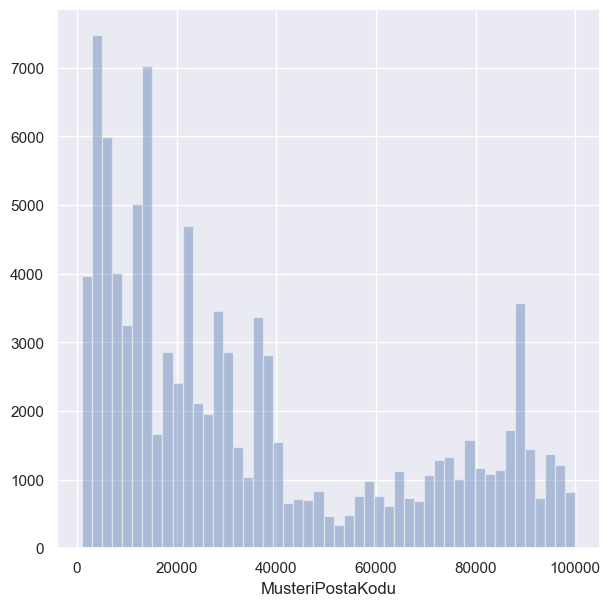

In [235]:
plt.figure(figsize=(7,7))
sns.distplot(df1['MusteriPostaKodu'], kde=False)
plt.show()


In [236]:
df1["MusteriSehri"].value_counts().count() #kaç tane şehir olduğu görüldü.

4119

In [237]:
df1.groupby("MusteriSehri").size() #hangi şehirde kaç tane müşteri var buna bakıldı. 

MusteriSehri
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             11
abaiara                 2
                       ..
xinguara                9
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Length: 4119, dtype: int64

In [238]:
df1.groupby("MusteriPostaKodu")["MusteriUlke"].value_counts() 

MusteriPostaKodu  MusteriUlke
1003              SP             1
1004              SP             2
1005              SP             6
1006              SP             2
1007              SP             4
                                ..
99960             RS             2
99965             RS             2
99970             RS             1
99980             RS             2
99990             RS             1
Name: MusteriUlke, Length: 14994, dtype: int64

-------------------------------------------**geolocation_dataset hakkında bilgiler**-----------------------------------------------

In [239]:
df2 = pd.read_csv("geolocation_dataset.csv", engine='python') # veri setimizi çektik.
df2.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [240]:
df2.rename(columns={"geolocation_zip_code_prefix" :"CografiPostaKodu", 
                    "geolocation_lat":"CografiEnlem", 
                    "geolocation_lng":"CografiBoylam",
                    "geolocation_city":"CografiSehir",
                    "geolocation_state":"CografiKonum"}, inplace=True)
df2.head()

,CografiPostaKodu,CografiEnlem,CografiBoylam,CografiSehir,CografiKonum
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [241]:
df2.tail()

,CografiPostaKodu,CografiEnlem,CografiBoylam,CografiSehir,CografiKonum
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [242]:
df2.info() 
# 3 sayısal, 2 kategorik veri tipi var. Boş değer yok.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CografiPostaKodu  1000163 non-null  int64  
 1   CografiEnlem      1000163 non-null  float64
 2   CografiBoylam     1000163 non-null  float64
 3   CografiSehir      1000163 non-null  object 
 4   CografiKonum      1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [243]:
df2.dtypes

CografiPostaKodu      int64
CografiEnlem        float64
CografiBoylam       float64
CografiSehir         object
CografiKonum         object
dtype: object

In [244]:
df2.nunique()

CografiPostaKodu     19015
CografiEnlem        717360
CografiBoylam       717613
CografiSehir          8011
CografiKonum            27
dtype: int64

In [245]:
df2.groupby("CografiPostaKodu")["CografiSehir"].value_counts() 

CografiPostaKodu  CografiSehir   
1001              sao paulo          23
                  são paulo           3
1002              sao paulo          12
                  são paulo           1
1003              sao paulo          16
                                     ..
99965             agua santa          6
99970             ciriaco            20
                  ciríaco             1
99980             david canabarro    26
99990             muliterno           2
Name: CografiSehir, Length: 27907, dtype: int64

In [246]:
print(sum(df2.duplicated(keep="first"))) #dublicate veri kontrolü


261831


In [247]:
df2.drop_duplicates()

,CografiPostaKodu,CografiEnlem,CografiBoylam,CografiSehir,CografiKonum
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [248]:
df2.shape

(1000163, 5)

In [249]:
df2.columns

Index(['CografiPostaKodu', 'CografiEnlem', 'CografiBoylam', 'CografiSehir',
       'CografiKonum'],
      dtype='object')

c:\Users\BEYZA ASLAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='CografiPostaKodu'>

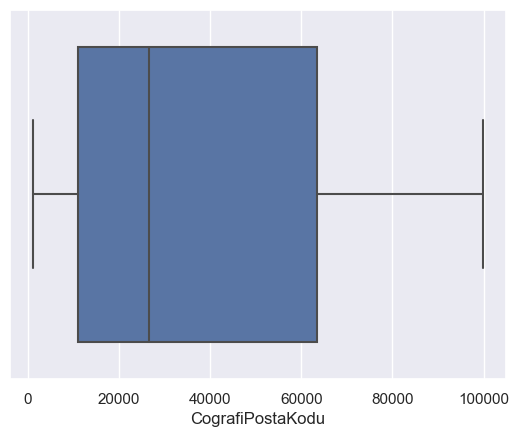

In [250]:
sns.boxplot(x = df2["CografiPostaKodu"], orient = "v") 

-------------------------------------------**order_items_dataset.csv hakkında bilgiler**------------------------------

In [251]:
df3 = pd.read_csv("order_items_dataset.csv", engine='python') #veri setimizi çektik.
df3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [252]:
df3.rename(columns={"order_id" :"SiparisNo", 
                    "order_item_id":"SiparisTurNo", 
                    "product_id":"UrunNo",
                    "seller_id":"SaticiNo",
                    "shipping_limit_date":"NakliyeTarihi",
                    "price":"Fiyat ",
                    "freight_value":"NakliyeUcreti"}, inplace=True)

In [253]:
df3.head()

,SiparisNo,SiparisTurNo,UrunNo,SaticiNo,NakliyeTarihi,Fiyat,NakliyeUcreti
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [254]:
df3.tail()

,SiparisNo,SiparisTurNo,UrunNo,SaticiNo,NakliyeTarihi,Fiyat,NakliyeUcreti
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [255]:
df3.sort_values(by='NakliyeUcreti', ascending=False).head(5) #en yüksek nakliye ücretine sahip ürünlerin sıralanması

,SiparisNo,SiparisTurNo,UrunNo,SaticiNo,NakliyeTarihi,Fiyat,NakliyeUcreti
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30


In [256]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SiparisNo      112650 non-null  object 
 1   SiparisTurNo   112650 non-null  int64  
 2   UrunNo         112650 non-null  object 
 3   SaticiNo       112650 non-null  object 
 4   NakliyeTarihi  112650 non-null  object 
 5   Fiyat          112650 non-null  float64
 6   NakliyeUcreti  112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [257]:
df3.dtypes

SiparisNo         object
SiparisTurNo       int64
UrunNo            object
SaticiNo          object
NakliyeTarihi     object
Fiyat            float64
NakliyeUcreti    float64
dtype: object

In [258]:
df3.nunique()

SiparisNo        98666
SiparisTurNo        21
UrunNo           32951
SaticiNo          3095
NakliyeTarihi    93318
Fiyat             5968
NakliyeUcreti     6999
dtype: int64

In [259]:
print(sum(df3.duplicated(keep="first"))) #dublicate veri kontrolü


0


In [260]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
SiparisTurNo,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
Fiyat,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
NakliyeUcreti,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [261]:
df3.groupby("UrunNo")["SiparisNo"].value_counts()

UrunNo                            SiparisNo                       
00066f42aeeb9f3007548bb9d3f33c38  f30149f4a8882a08895b6a242aa0d612    1
00088930e925c41fd95ebfe695fd2655  f5eda0ded77c1293b04c953138c8331d    1
0009406fd7479715e4bef61dd91f2462  0bf736fd0fd5169d60de3699fcbcf986    1
000b8f95fcb9e0096488278317764d19  3aba44d8e554ab4bb8c09f6f78032ca8    1
                                  6f0dfb5b5398b271cc6bbd9ee263530e    1
                                                                     ..
fffdb2d0ec8d6a61f0a0a0db3f25b441  a8159270bc9cf7d54450e079ba6b7232    1
                                  beaf95465b542dea76df78b2fb86a97a    1
                                  d6c1ed12e8eeaa15e9d5c83c79598f85    1
                                  dd38c566a34ff9deb93ff05d7bd6d0aa    1
fffe9eeff12fcbd74a2f2b007dde0c58  fbf3da6fe82010412982890b0c57e532    1
Name: SiparisNo, Length: 102425, dtype: int64

<AxesSubplot: xlabel='NakliyeUcreti'>

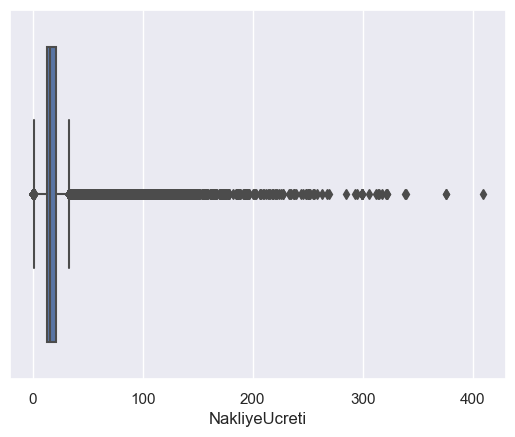

In [262]:
sns.boxplot(x = df3["NakliyeUcreti"])

In [263]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
SiparisTurNo,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
Fiyat,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
NakliyeUcreti,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [264]:
df3["SiparisTurNo"].value_counts() #21 tane sipariş türü var ve her sipariş türünden ne kadar olduğunun analizi.

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: SiparisTurNo, dtype: int64

In [265]:
df3.isnull() #boş değer yok

,SiparisNo,SiparisTurNo,UrunNo,SaticiNo,NakliyeTarihi,Fiyat,NakliyeUcreti
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
112645,False,False,False,False,False,False,False
112646,False,False,False,False,False,False,False
112647,False,False,False,False,False,False,False
112648,False,False,False,False,False,False,False


In [266]:
df3.shape

(112650, 7)

-------------------------------------------**order_payments_dataset**------------------------------------------------

In [267]:
df4 = pd.read_csv("order_payments_dataset.csv", engine='python') #veri setimizi çektik.
df4.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [268]:
df4.rename(columns={"order_id" :"SiparisNo", 
                    "payment_sequential":"OdemeSirasi", 
                    "payment_type":"OdemeTipi",
                    "payment_installments":"OdemeTaksidi",
                    "payment_value":"OdenecekTutar",
                    }, inplace=True)

In [269]:
df4.tail()

,SiparisNo,OdemeSirasi,OdemeTipi,OdemeTaksidi,OdenecekTutar
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [270]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SiparisNo      103886 non-null  object 
 1   OdemeSirasi    103886 non-null  int64  
 2   OdemeTipi      103886 non-null  object 
 3   OdemeTaksidi   103886 non-null  int64  
 4   OdenecekTutar  103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [271]:
df4.dtypes

SiparisNo         object
OdemeSirasi        int64
OdemeTipi         object
OdemeTaksidi       int64
OdenecekTutar    float64
dtype: object

In [272]:
df4.nunique()

SiparisNo        99440
OdemeSirasi         29
OdemeTipi            5
OdemeTaksidi        24
OdenecekTutar    29077
dtype: int64

c:\Users\BEYZA ASLAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='OdenecekTutar'>

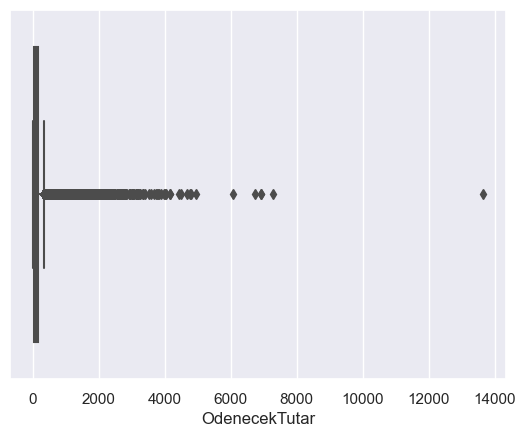

In [273]:
sns.boxplot(x = df4["OdenecekTutar"], orient = "v") #aykırı değer tespiti

In [274]:
df4[df4["OdemeTipi"]=="credit_card"]

,SiparisNo,OdemeSirasi,OdemeTipi,OdemeTaksidi,OdenecekTutar
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [275]:
df4["OdemeTipi"].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: OdemeTipi, dtype: int64

Text(0.5, 1.0, 'Ödeme Türlerine Göre Sıralama')

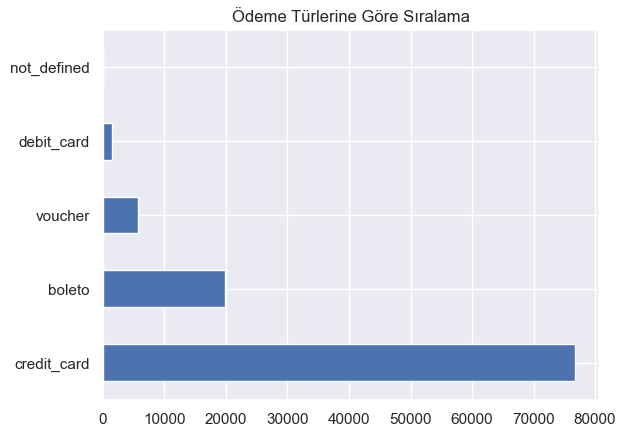

In [276]:
df4["OdemeTipi"].value_counts().plot.barh().set_title("Ödeme Türlerine Göre Sıralama")

Text(0.5, 1.0, 'Ödeme Taksitlerine Göre Sıralama')

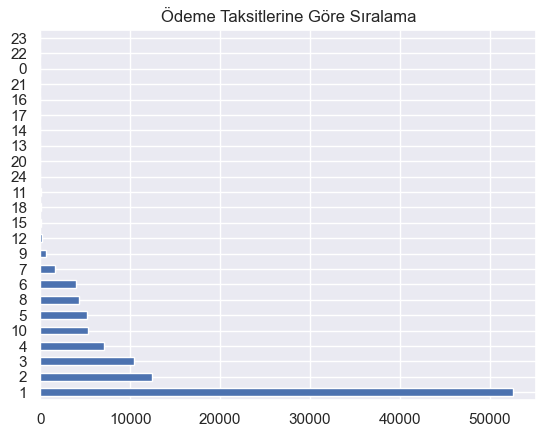

In [277]:
df4["OdemeTaksidi"].value_counts().plot.barh().set_title("Ödeme Taksitlerine Göre Sıralama")

In [278]:
df4['OdenecekTutar'].max() #maksimum ödencek tutara bakıldı. 

13664.08

In [279]:
df4.shape

(103886, 5)

In [280]:
df4.isnull()

,SiparisNo,OdemeSirasi,OdemeTipi,OdemeTaksidi,OdenecekTutar
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
103881,False,False,False,False,False
103882,False,False,False,False,False
103883,False,False,False,False,False
103884,False,False,False,False,False


In [281]:

print(sum(df4.duplicated(keep="first"))) #dublicate veri kontrolü

0


In [282]:
df4.groupby("OdemeTipi").size() #ödeme türüne göre gruplama yapıldı

OdemeTipi
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
dtype: int64

In [283]:
df4["OdenecekTutar"].mean() #ortalama sipariş tutarı

154.10038041699553

------------------------------------------**order_reviews_dataset**---------------------------------------------------

In [284]:
df5 = pd.read_csv("order_reviews_dataset.csv", engine='python') #veri setimizi çektik.
df5.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [285]:
df5.rename(columns={"review_id" :"İncelenenNo", 
                    "order_id":"SiparisNo",
                    "review_score":"İncelenenSayisi",
                    "review_comment_title":"İncelenenYorumBaslik",
                    "review_comment_message":"İncelenenYorumMesaji",
                    "review_creation_date":"İncelemeTarihi"
                    }, inplace=True)
df5.head()

,İncelenenNo,SiparisNo,İncelenenSayisi,İncelenenYorumBaslik,İncelenenYorumMesaji,İncelemeTarihi,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [286]:
df5.tail()

,İncelenenNo,SiparisNo,İncelenenSayisi,İncelenenYorumBaslik,İncelenenYorumMesaji,İncelemeTarihi,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [287]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   İncelenenNo              99224 non-null  object
 1   SiparisNo                99224 non-null  object
 2   İncelenenSayisi          99224 non-null  int64 
 3   İncelenenYorumBaslik     11568 non-null  object
 4   İncelenenYorumMesaji     40977 non-null  object
 5   İncelemeTarihi           99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [288]:
df5.dtypes

İncelenenNo                object
SiparisNo                  object
İncelenenSayisi             int64
İncelenenYorumBaslik       object
İncelenenYorumMesaji       object
İncelemeTarihi             object
review_answer_timestamp    object
dtype: object

In [289]:
df5.nunique()

İncelenenNo                98410
SiparisNo                  98673
İncelenenSayisi                5
İncelenenYorumBaslik        4527
İncelenenYorumMesaji       36159
İncelemeTarihi               636
review_answer_timestamp    98248
dtype: int64

In [290]:
df5.isnull() #reviev_comment_title ve review_comment_message verilerinde boşluklar bulunmakta. 

,İncelenenNo,SiparisNo,İncelenenSayisi,İncelenenYorumBaslik,İncelenenYorumMesaji,İncelemeTarihi,review_answer_timestamp
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
99219,False,False,False,True,True,False,False
99220,False,False,False,True,True,False,False
99221,False,False,False,True,False,False,False
99222,False,False,False,True,True,False,False


In [291]:
pd.isnull(df5).sum() #df5 veri setinde kaç tane boşluk var bunu gördük. 

İncelenenNo                    0
SiparisNo                      0
İncelenenSayisi                0
İncelenenYorumBaslik       87656
İncelenenYorumMesaji       58247
İncelemeTarihi                 0
review_answer_timestamp        0
dtype: int64

In [292]:
tr = len(df5) * 0.4 # verilerin % 60 ı eksikse o sütunu kaldırır.
df5.dropna(thresh = tr, axis = 1, inplace = True)
df5

,İncelenenNo,SiparisNo,İncelenenSayisi,İncelenenYorumMesaji,İncelemeTarihi,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [293]:
df5.columns

Index(['İncelenenNo', 'SiparisNo', 'İncelenenSayisi', 'İncelenenYorumMesaji',
       'İncelemeTarihi', 'review_answer_timestamp'],
      dtype='object')

In [294]:
df5.dropna(subset=["İncelenenYorumBaslik"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df5.head()

KeyError: ['İncelenenYorumBaslik']

In [ ]:
df5.dropna(subset=["İncelenenYorumMesaji"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df5.head()

,İncelenenNo,SiparisNo,İncelenenSayisi,İncelenenYorumBaslik,İncelenenYorumMesaji,İncelemeTarihi,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00,2018-06-09 18:44:02


In [ ]:
df5.isnull().sum()

İncelenenNo                0
SiparisNo                  0
İncelenenSayisi            0
İncelenenYorumBaslik       0
İncelenenYorumMesaji       0
İncelemeTarihi             0
review_answer_timestamp    0
dtype: int64

-----------------------------------------------**orders_dataset**--------------------------------------------------

In [ ]:
df6 = pd.read_csv("orders_dataset.csv", engine='python') #veri setimizi çektik.
df6.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
df6.rename(columns={"order_id" :"SiparisNo", 
                    "customer_id":"MusteriNo",
                    "order_status":"SiparisDurumu",
                    "order_purchase_timestamp":"SiparisAlinmaZamani",
                    "order_approved_at":"SiparisKabulZamani",
                    "order_delivered_carrier_date":"SiparisKargoZamani",
                    "order_delivered_customer_date":"SiparisMusteriTeslimZamani",
                    "order_estimated_delivery_date":"TahminiSiparisMusteriTeslimTarihi"
                    }, inplace=True)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   SiparisNo                          99441 non-null  object
 1   MusteriNo                          99441 non-null  object
 2   SiparisDurumu                      99441 non-null  object
 3   SiparisAlinmaZamani                99441 non-null  object
 4   SiparisKabulZamani                 99281 non-null  object
 5   SiparisKargoZamani                 97658 non-null  object
 6   SiparisMusteriTeslimZamani         96476 non-null  object
 7   TahminiSiparisMusteriTeslimTarihi  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df6.isnull().sum()

SiparisNo                               0
MusteriNo                               0
SiparisDurumu                           0
SiparisAlinmaZamani                     0
SiparisKabulZamani                    160
SiparisKargoZamani                   1783
SiparisMusteriTeslimZamani           2965
TahminiSiparisMusteriTeslimTarihi       0
dtype: int64

In [ ]:
df6.SiparisKabulZamani.fillna(0, inplace=True)

In [ ]:
df6.SiparisKargoZamani.fillna(0, inplace=True)

In [ ]:
df6.SiparisMusteriTeslimZamani.fillna(0, inplace=True)

In [ ]:
df6.isnull().sum()

SiparisNo                            0
MusteriNo                            0
SiparisDurumu                        0
SiparisAlinmaZamani                  0
SiparisKabulZamani                   0
SiparisKargoZamani                   0
SiparisMusteriTeslimZamani           0
TahminiSiparisMusteriTeslimTarihi    0
dtype: int64

In [ ]:
print(sum(df6.duplicated(keep="first"))) #dublicate veri kontrolü

0


--------------------------------------**product_category_name.csv**------------------------------------------------

In [ ]:
df7 = pd.read_csv("product_category_name_translation.csv", engine='python') #veri setimizi çektik.
df7.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
df7.rename(columns={ "product_category_name":"UrunKategoriİsmi",
                    "product_category_name_english":"UrunKategori_İngilizceİsmi" }, inplace=True)
df7.head()

,UrunKategoriİsmi,UrunKategori_İngilizceİsmi
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


--------------------------------------------------**products_dataset_csv**---------------------------------------------

In [ ]:
df8 = pd.read_csv("products_dataset.csv", engine='python') #veri setimizi çektik.
df8.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df8.rename(columns={"product_id" :"UrunNo", 
                    "product_category_name":"UrunKategoriİsmi",
                    "product_name_lenght":"UrunİsmiUzunlugu",
                    "product_description_lenght":"UrunTanımıUzunlugu",
                    "product_photos_qty":"UrunFotografKalitesi",
                    "product_weight_g":"UrunAgirligi(gram)",
                    "product_length_cm":"UrunUzunlugu(cm)",
                    "product_height_cm":"UrunYuksekligi(cm)",
                    "product_width_cm":"UrunGenisligi(cm)"}, inplace=True)
df8.head()

,UrunNo,UrunKategoriİsmi,UrunİsmiUzunlugu,UrunTanımıUzunlugu,UrunFotografKalitesi,UrunAgirligi(gram),UrunUzunlugu(cm),UrunYuksekligi(cm),UrunGenisligi(cm)
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UrunNo                32951 non-null  object 
 1   UrunKategoriİsmi      32341 non-null  object 
 2   UrunİsmiUzunlugu      32341 non-null  float64
 3   UrunTanımıUzunlugu    32341 non-null  float64
 4   UrunFotografKalitesi  32341 non-null  float64
 5   UrunAgirligi(gram)    32949 non-null  float64
 6   UrunUzunlugu(cm)      32949 non-null  float64
 7   UrunYuksekligi(cm)    32949 non-null  float64
 8   UrunGenisligi(cm)     32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df8.isnull().sum()

UrunNo                    0
UrunKategoriİsmi        610
UrunİsmiUzunlugu        610
UrunTanımıUzunlugu      610
UrunFotografKalitesi    610
UrunAgirligi(gram)        2
UrunUzunlugu(cm)          2
UrunYuksekligi(cm)        2
UrunGenisligi(cm)         2
dtype: int64

In [ ]:
df8.dropna(subset=["UrunKategoriİsmi"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunİsmiUzunlugu"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunTanımıUzunlugu"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunFotografKalitesi"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunAgirligi(gram)"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunUzunlugu(cm)"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunYuksekligi(cm)"], axis=0, inplace=True) #eksik değerlerimizi sildik.
df8.dropna(subset=["UrunGenisligi(cm)"], axis=0, inplace=True) #eksik değerlerimizi sildik.

df8.isnull().sum()

UrunNo                  0
UrunKategoriİsmi        0
UrunİsmiUzunlugu        0
UrunTanımıUzunlugu      0
UrunFotografKalitesi    0
UrunAgirligi(gram)      0
UrunUzunlugu(cm)        0
UrunYuksekligi(cm)      0
UrunGenisligi(cm)       0
dtype: int64

In [ ]:
print(sum(df8.duplicated(keep="first"))) #dublicate veri 


0


In [ ]:
df8[df8["UrunAgirligi(gram)"] < 500] #ürün ağırlığı 500 gr dan küçük olan ürünler filtrelendi.

,UrunNo,UrunKategoriİsmi,UrunİsmiUzunlugu,UrunTanımıUzunlugu,UrunFotografKalitesi,UrunAgirligi(gram),UrunUzunlugu(cm),UrunYuksekligi(cm),UrunGenisligi(cm)
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
...,...,...,...,...,...,...,...,...,...
32936,4e1d2ef2974c85d82582edfe594a4f57,esporte_lazer,43.0,191.0,4.0,300.0,25.0,10.0,20.0
32937,d218a47759ef0d1db44044934909b88b,telefonia,50.0,778.0,1.0,350.0,17.0,11.0,11.0
32939,4508e088c4a07e0ad64f6fa3751e314a,esporte_lazer,45.0,1931.0,1.0,330.0,24.0,20.0,16.0
32944,1a14237ecc2fe3772b55c8d4e11ccb35,moveis_decoracao,58.0,1405.0,3.0,150.0,35.0,2.0,25.0


In [ ]:
df8[df8["UrunKategoriİsmi"] == "bebes"]

,UrunNo,UrunKategoriİsmi,UrunİsmiUzunlugu,UrunTanımıUzunlugu,UrunFotografKalitesi,UrunAgirligi(gram),UrunUzunlugu(cm),UrunYuksekligi(cm),UrunGenisligi(cm)
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
11,03b63c5fc16691530586ae020c345514,bebes,49.0,728.0,4.0,7150.0,50.0,19.0,45.0
23,8b41fbc2b984a12030090112324d1bc4,bebes,55.0,1627.0,1.0,500.0,20.0,13.0,13.0
35,5370b82a213393979691c98074265584,bebes,52.0,708.0,9.0,7950.0,33.0,30.0,44.0
43,b864b103180d5a6a3f830e67f93e8735,bebes,47.0,980.0,4.0,600.0,70.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...
32823,cba32576375902a87170bedaed045b71,bebes,58.0,1882.0,4.0,11467.0,35.0,57.0,52.0
32851,026311ea0b72ef8c80ebf91efd36b499,bebes,52.0,708.0,1.0,300.0,18.0,8.0,24.0
32853,34c84b2e246f5904a5b3597b00240ea2,bebes,55.0,1636.0,1.0,600.0,20.0,13.0,13.0
32935,d4484cc239fbd0ac671ab04d931edc66,bebes,42.0,414.0,2.0,150.0,23.0,15.0,15.0


In [ ]:

df8["UrunGenisligi(cm)"].mean() #ürünlerin ortalama genişliği 

23.208596165739024

In [ ]:

df8["UrunUzunlugu(cm)"].mean() #ürünlerin ortalama uzunluğu

30.854545454545455

c:\Users\BEYZA ASLAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='UrunAgirligi(gram)'>

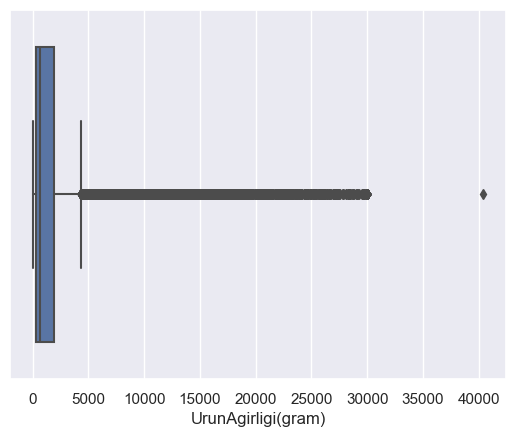

In [ ]:
sns.boxplot(x = df8["UrunAgirligi(gram)"], orient = "v") #aykırı değer tespiti

In [ ]:
df8.groupby("UrunNo")["UrunKategoriİsmi"].value_counts() 


UrunNo                            UrunKategoriİsmi           
00066f42aeeb9f3007548bb9d3f33c38  perfumaria                     1
00088930e925c41fd95ebfe695fd2655  automotivo                     1
0009406fd7479715e4bef61dd91f2462  cama_mesa_banho                1
000b8f95fcb9e0096488278317764d19  utilidades_domesticas          1
000d9be29b5207b54e86aa1b1ac54872  relogios_presentes             1
                                                                ..
fff6177642830a9a94a0f2cba5e476d1  cool_stuff                     1
fff81cc3158d2725c0655ab9ba0f712c  beleza_saude                   1
fff9553ac224cec9d15d49f5a263411f  fashion_bolsas_e_acessorios    1
fffdb2d0ec8d6a61f0a0a0db3f25b441  informatica_acessorios         1
fffe9eeff12fcbd74a2f2b007dde0c58  brinquedos                     1
Name: UrunKategoriİsmi, Length: 32341, dtype: int64

In [ ]:
df8.groupby("UrunKategoriİsmi").size()

UrunKategoriİsmi
agro_industria_e_comercio      74
alimentos                      82
alimentos_bebidas             104
artes                          55
artes_e_artesanato             19
                             ... 
sinalizacao_e_seguranca        93
tablets_impressao_imagem        9
telefonia                    1134
telefonia_fixa                116
utilidades_domesticas        2335
Length: 73, dtype: int64

-----------------------------------------------**sellers_dataset**-----------------------------------------------------

In [ ]:
df9 = pd.read_csv("sellers_dataset.csv", engine='python') #veri setimizi çektik.
df9.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df9.rename(columns={"seller_id" :"SaticiNo", 
                    "seller_zip_code_prefix":"SaticiPostaKodu",
                    "seller_city":"SaticiSehri",
                    "seller_state":"SaticiUlke",
                    }, inplace=True)
df9.head()

,SaticiNo,SaticiPostaKodu,SaticiSehri,SaticiUlke
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df9[df9["SaticiUlke"]=="SP"]

,SaticiNo,SaticiPostaKodu,SaticiSehri,SaticiUlke
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
...,...,...,...,...
3087,f00f5b35d0abcacbdd863672f4bb2c1a,1238,sao paulo,SP
3088,7bac63f6603d382cc8d0832eb6c100a8,5713,sao paulo,SP
3089,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SaticiNo         3095 non-null   object
 1   SaticiPostaKodu  3095 non-null   int64 
 2   SaticiSehri      3095 non-null   object
 3   SaticiUlke       3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df9.shape

(3095, 4)

In [ ]:
df9.head()

,SaticiNo,SaticiPostaKodu,SaticiSehri,SaticiUlke
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
df9.tail()

,SaticiNo,SaticiPostaKodu,SaticiSehri,SaticiUlke
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [ ]:
df9.isnull().sum()

SaticiNo           0
SaticiPostaKodu    0
SaticiSehri        0
SaticiUlke         0
dtype: int64

In [ ]:
print(sum(df9.duplicated(keep="first"))) #dublicate veri kontrolü


0


In [ ]:
df9.groupby("SaticiNo")["SaticiSehri"].value_counts() 

SaticiNo                          SaticiSehri
0015a82c2db000af6aaaf3ae2ecb0532  santo andre    1
001cca7ae9ae17fb1caed9dfb1094831  cariacica      1
001e6ad469a905060d959994f1b41e4f  sao goncalo    1
002100f778ceb8431b7a1020ff7ab48f  franca         1
003554e2dce176b5555353e4f3555ac8  goiania        1
                                                ..
ffcfefa19b08742c5d315f2791395ee5  curitiba       1
ffdd9f82b9a447f6f8d4b91554cc7dd3  curitiba       1
ffeee66ac5d5a62fe688b9d26f83f534  mirassol       1
fffd5413c0700ac820c7069d66d98c89  amparo         1
ffff564a4f9085cd26170f4732393726  campinas       1
Name: SaticiSehri, Length: 3095, dtype: int64

C:\Users\BEYZA ASLAN\AppData\Local\Temp\ipykernel_13104\1329956118.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df9['SaticiPostaKodu'], kde=False)


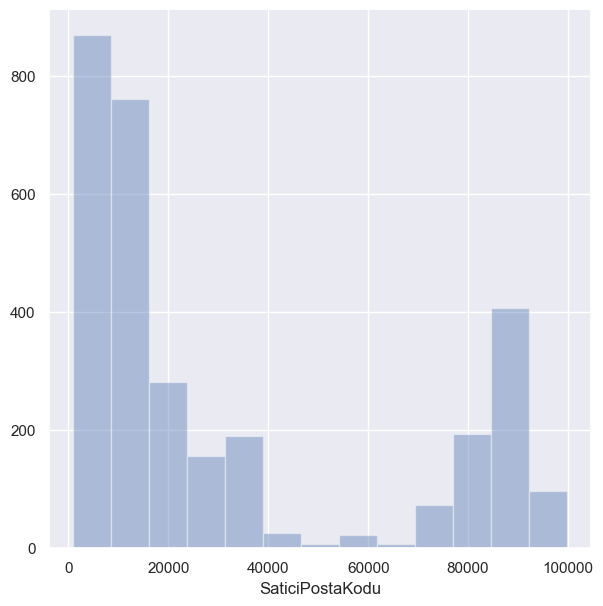

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df9['SaticiPostaKodu'], kde=False)
plt.show()


In [ ]:
df9[df9["SaticiPostaKodu"]>10000]

,SaticiNo,SaticiPostaKodu,SaticiSehri,SaticiUlke
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
...,...,...,...,...
3086,725af026f869236a8dd0ceb98564d156,35530,claudio,MG
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Merge İşlemleri**

--------------------**order_items_dataset ile seller_dataset birleşimi (Satıcı numarasına göre)**-----------------------

In [ ]:
satici_siparis = df3.merge(df9, how='inner', on= "SaticiNo")
satici_siparis

,SiparisNo,SiparisTurNo,UrunNo,SaticiNo,NakliyeTarihi,Fiyat,NakliyeUcreti,SaticiPostaKodu,SaticiSehri,SaticiUlke
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.90,9.94,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.90,20.17,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.90,15.16,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.90,16.74,27277,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


In [ ]:
satici_siparis.columns

Index(['SiparisNo', 'SiparisTurNo', 'UrunNo', 'SaticiNo', 'NakliyeTarihi',
       'Fiyat ', 'NakliyeUcreti', 'SaticiPostaKodu', 'SaticiSehri',
       'SaticiUlke'],
      dtype='object')

In [ ]:
print(sum(satici_siparis.duplicated(keep="first"))) #dublicate veri kontrolü
satici_siparis.dtypes

0


SiparisNo           object
SiparisTurNo         int64
UrunNo              object
SaticiNo            object
NakliyeTarihi       object
Fiyat              float64
NakliyeUcreti      float64
SaticiPostaKodu      int64
SaticiSehri         object
SaticiUlke          object
dtype: object

-----------------------------**order_payments_dataset ile orders_dataset birleşimi**-------------------------------

In [ ]:
siparis = df4.merge(df6, how='inner', on= "SiparisNo")
siparis

,SiparisNo,OdemeSirasi,OdemeTipi,OdemeTaksidi,OdenecekTutar,MusteriNo,SiparisDurumu,SiparisAlinmaZamani,SiparisKabulZamani,SiparisKargoZamani,SiparisMusteriTeslimZamani,TahminiSiparisMusteriTeslimTarihi
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,2017-11-18 17:46:05,0,0,2017-12-05 00:00:00
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00


In [ ]:
siparis.columns

Index(['SiparisNo', 'OdemeSirasi', 'OdemeTipi', 'OdemeTaksidi',
       'OdenecekTutar', 'MusteriNo', 'SiparisDurumu', 'SiparisAlinmaZamani',
       'SiparisKabulZamani', 'SiparisKargoZamani',
       'SiparisMusteriTeslimZamani', 'TahminiSiparisMusteriTeslimTarihi'],
      dtype='object')

In [ ]:
siparis.dtypes

SiparisNo                             object
OdemeSirasi                            int64
OdemeTipi                             object
OdemeTaksidi                           int64
OdenecekTutar                        float64
MusteriNo                             object
SiparisDurumu                         object
SiparisAlinmaZamani                   object
SiparisKabulZamani                    object
SiparisKargoZamani                    object
SiparisMusteriTeslimZamani            object
TahminiSiparisMusteriTeslimTarihi     object
dtype: object

c:\Users\BEYZA ASLAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot: xlabel='OdenecekTutar'>

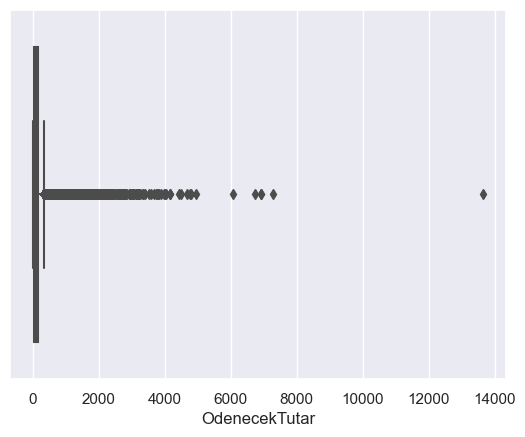

In [ ]:
sns.boxplot(x = siparis["OdenecekTutar"], orient = "v") #aykırı değer tespiti

In [ ]:
siparis.mean()

C:\Users\BEYZA ASLAN\AppData\Local\Temp\ipykernel_13104\4187354595.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  siparis.mean()


OdemeSirasi        1.092679
OdemeTaksidi       2.853349
OdenecekTutar    154.100380
dtype: float64

In [ ]:
print(sum(siparis.duplicated(keep="first"))) #dublicate veri kontrolü
siparis.dtypes

0


SiparisNo                             object
OdemeSirasi                            int64
OdemeTipi                             object
OdemeTaksidi                           int64
OdenecekTutar                        float64
MusteriNo                             object
SiparisDurumu                         object
SiparisAlinmaZamani                   object
SiparisKabulZamani                    object
SiparisKargoZamani                    object
SiparisMusteriTeslimZamani            object
TahminiSiparisMusteriTeslimTarihi     object
dtype: object

In [302]:
siparis['Toplam_Fiyat'] = siparis['OdemeTaksidi']*siparis['OdenecekTutar'] 
#bir ürüne ödenecek toplam fiyat
siparis.head()

,SiparisNo,OdemeSirasi,OdemeTipi,OdemeTaksidi,OdenecekTutar,MusteriNo,SiparisDurumu,SiparisAlinmaZamani,SiparisKabulZamani,SiparisKargoZamani,SiparisMusteriTeslimZamani,TahminiSiparisMusteriTeslimTarihi,Toplam_Fiyat
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,794.64
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,862.24
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,256.90


In [303]:
siparis.groupby(by=['MusteriNo'], as_index=False)['Toplam_Fiyat'].sum().head()
#bir müşterinin toplam harcaması 


,MusteriNo,Toplam_Fiyat
0,00012a2ce6f8dcda20d059ce98491703,917.92
1,000161a058600d5901f007fab4c27140,337.05
2,0001fd6190edaaf884bcaf3d49edf079,1954.20
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [305]:
siparis["SiparisAlinmaZamani"].value_counts()

2017-04-20 12:45:34    29
2017-06-07 12:05:10    26
2017-12-08 12:00:04    22
2017-08-08 20:26:31    21
2017-05-12 16:24:51    19
                       ..
2017-05-31 17:06:39     1
2017-11-15 17:32:32     1
2017-02-21 16:17:51     1
2018-07-21 01:22:16     1
2017-12-05 08:18:35     1
Name: SiparisAlinmaZamani, Length: 98874, dtype: int64

In [308]:
pd.value_counts(siparis.values.flatten())

1                                   151908
delivered                           100756
credit_card                          76795
boleto                               19784
2                                    15458
                                     ...  
2018-06-03 23:56:23                      1
b4284429dbdcf5d197a909adf3362caf         1
fcdd373db44c238886a0ecf5ec332b95         1
2018-04-19 21:08:51                      1
2018-02-05 14:59:09                      1
Length: 618200, dtype: int64

In [309]:
siparis['SiparisAlinmaZamani'] = siparis.InvoiceDate.dt.to_period('M').astype(str)
order_per_month = siparis.groupby('SiparisAlinmaZamani', as_index=False).TotalPrice.sum()
ax = sns.lineplot(x="Aylık Sipariş", y="Toplam Fiyat", data=order_per_month)
ax.set_title('Aylık Sipariş')


AttributeError: 'DataFrame' object has no attribute 'InvoiceDate'

------------------------------**customers_dataset ile orders_dataset birleşimi**------------------------------------

In [ ]:
musteri_siparis=df1.merge(df6, how='inner', on= "MusteriNo")
musteri_siparis


,MusteriNo,BenzersizMusteriNo,MusteriPostaKodu,MusteriSehri,MusteriUlke,SiparisNo,SiparisDurumu,SiparisAlinmaZamani,SiparisKabulZamani,SiparisKargoZamani,SiparisMusteriTeslimZamani,TahminiSiparisMusteriTeslimTarihi
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


<AxesSubplot: >

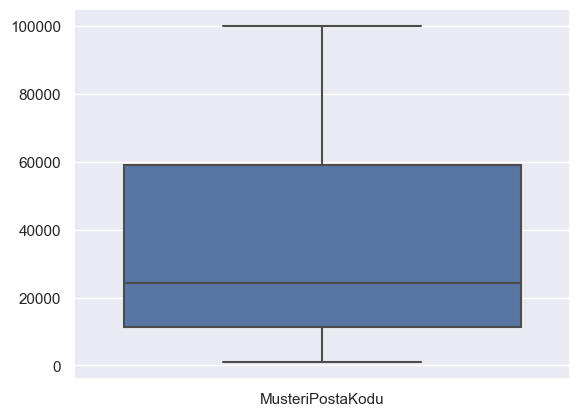

In [ ]:
sns.boxplot(musteri_siparis)

In [ ]:
musteri_siparis.columns

Index(['MusteriNo', 'BenzersizMusteriNo', 'MusteriPostaKodu', 'MusteriSehri',
       'MusteriUlke', 'SiparisNo', 'SiparisDurumu', 'SiparisAlinmaZamani',
       'SiparisKabulZamani', 'SiparisKargoZamani',
       'SiparisMusteriTeslimZamani', 'TahminiSiparisMusteriTeslimTarihi'],
      dtype='object')

In [299]:
musteri_siparis.groupby(by=['MusteriNo','MusteriUlke'])['SiparisNo'].count().head() 
#müşterilerin ülke bazında ne kadar siperiş verdikleri


MusteriNo                         MusteriUlke
00012a2ce6f8dcda20d059ce98491703  SP             1
000161a058600d5901f007fab4c27140  MG             1
0001fd6190edaaf884bcaf3d49edf079  ES             1
0002414f95344307404f0ace7a26f1d5  MG             1
000379cdec625522490c315e70c7a9fb  SP             1
Name: SiparisNo, dtype: int64

In [ ]:
print(sum(musteri_siparis.duplicated(keep="first"))) #dublicate veri kontrolü
musteri_siparis.dtypes

0


MusteriNo                            object
BenzersizMusteriNo                   object
MusteriPostaKodu                      int64
MusteriSehri                         object
MusteriUlke                          object
SiparisNo                            object
SiparisDurumu                        object
SiparisAlinmaZamani                  object
SiparisKabulZamani                   object
SiparisKargoZamani                   object
SiparisMusteriTeslimZamani           object
TahminiSiparisMusteriTeslimTarihi    object
dtype: object

In [311]:
musteri_siparis["SiparisDurumu"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: SiparisDurumu, dtype: int64

In [316]:
musteri_siparis.groupby("SiparisNo")["TahminiSiparisMusteriTeslimTarihi"].value_counts() 
#sipariş numarasına göre tahmini teslim tarihi

SiparisNo                         TahminiSiparisMusteriTeslimTarihi
00010242fe8c5a6d1ba2dd792cb16214  2017-09-29 00:00:00                  1
00018f77f2f0320c557190d7a144bdd3  2017-05-15 00:00:00                  1
000229ec398224ef6ca0657da4fc703e  2018-02-05 00:00:00                  1
00024acbcdf0a6daa1e931b038114c75  2018-08-20 00:00:00                  1
00042b26cf59d7ce69dfabb4e55b4fd9  2017-03-17 00:00:00                  1
                                                                      ..
fffc94f6ce00a00581880bf54a75a037  2018-05-18 00:00:00                  1
fffcd46ef2263f404302a634eb57f7eb  2018-08-01 00:00:00                  1
fffce4705a9662cd70adb13d4a31832d  2017-11-10 00:00:00                  1
fffe18544ffabc95dfada21779c9644f  2017-08-25 00:00:00                  1
fffe41c64501cc87c801fd61db3f6244  2018-06-28 00:00:00                  1
Name: TahminiSiparisMusteriTeslimTarihi, Length: 99441, dtype: int64

In [312]:
musteri_siparis.groupby("SiparisDurumu")["MusteriUlke"].value_counts() 
#siparislerin ülkelere göre durumu

SiparisDurumu  MusteriUlke
approved       MG               1
               SP               1
canceled       SP             327
               RJ              86
               MG              64
                             ... 
unavailable    PA               2
               AL               1
               AM               1
               PI               1
               TO               1
Name: MusteriUlke, Length: 149, dtype: int64

In [314]:
musteri_siparis.groupby("SiparisDurumu")["SiparisMusteriTeslimZamani"].value_counts() 
#sipariş durumuna göre teslim zamanı


SiparisDurumu  SiparisMusteriTeslimZamani
approved       0                                2
canceled       0                              619
               2016-10-14 15:07:11              1
               2016-10-16 14:36:59              1
               2016-10-19 18:47:43              1
                                             ... 
delivered      2018-10-17 13:22:46              1
invoiced       0                              314
processing     0                              301
shipped        0                             1107
unavailable    0                              609
Name: SiparisMusteriTeslimZamani, Length: 95672, dtype: int64